In [1]:
from utils.game import *
from utils.agent import *
from utils.world import *
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

map_graph = np.array([
    [0, 1, 1, 0, 1, 0],
    [1, 0, 1, 0, 0, 0],
    [1, 1, 0, 1, 1, 0],
    [0, 1, 1, 0, 0, 0],
    [1, 0, 1, 0, 0, 1],
    [0, 0, 0, 0, 1, 0]
])
G = nx.from_numpy_array(map_graph)
pos = nx.spring_layout(G)

# Nb player
nb_player = 3

# Vector of presence on the map
# P[i, j] = #troops of player i in zone j
presence_map = np.array([
    [2, 1, 0, 0, 0, 0],
    [0, 0, 3, 2, 0, 0],
    [0, 0, 0, 0, 5, 2]
])

# World Map


c:\Users\Louis\anaconda3\envs\RL\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
owner = np.argmax(presence_map, axis=0)
troops = np.max(presence_map, axis=0)

colors = {0: 'red', 1: 'blue', 2: 'green'}
colors = [colors[i] for i in owner]

countries = {0 : "N. America",
            1 : "S. America",
            2 : "Europe",
            3 : "Africa",
            4 : "Asia",
            5 : "Oceania"
            }

# labels = {i:f"{i}: {countries[i]} ({troops[i]})" for i in range(map_graph.shape[0])}
labels = {i:f"{countries[i]} ({troops[i]})" for i in range(map_graph.shape[0])}

print(owner, troops)
print(colors)
print(labels)

[0 0 1 1 2 2] [2 1 3 2 5 2]
['red', 'red', 'blue', 'blue', 'green', 'green']
{0: 'N. America (2)', 1: 'S. America (1)', 2: 'Europe (3)', 3: 'Africa (2)', 4: 'Asia (5)', 5: 'Oceania (2)'}


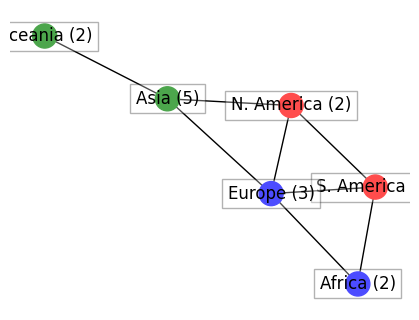

In [3]:
plt.figure(figsize=(4,3))
plt.tight_layout()
G = nx.from_numpy_array(map_graph)
label_options = {"ec": "k", "fc": "white", "alpha": 0.3}
nx.draw(G, pos, node_color=colors, labels=labels, bbox=label_options)
plt.show()


In [4]:
agent = PolicyGradientAgent()